In [1]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import conf_from_yaml, generator_from_conf
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

def queue_generations(*args: str):
    for yaml_path in args:
        conf = conf_from_yaml(yaml_path, repo_root)
        generator = generator_from_conf(conf, repo_root)
        generate_and_analyze(generator, conf)

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for class boost::shared_ptr<class RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.
c:\Users\fsfsf\anaconda3\envs\v3-forge\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\fsfsf\anaconda3\envs\v3-forge\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] 指定されたプロシージャが見つかりません。'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


seed: 1752132741
Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.2908, node: CN1CCO[C@@H](c2nc(NCc3ccccn3)nc(-c3ccccn3)n2)C1
<Best reward updated> 4 - time: 0.12, reward: 0.3604, node: Nc1nc2c[nH+]ccc2n1CCCCCc1ccccc1
<Best reward updated> 6 - time: 0.18, reward: 0.4182, node: N#C/C(=C\c1ccc(-c2ccccc2F)s1)C(=O)[O-]
100 - time: 3.23, average over 100: 0.2116
<Best reward updated> 116 - time: 3.73, reward: 0.4293, node: O[C@H](c1ccccc1)[C@H]1CO[C@H]2CCCC[C@H]2N1C1CC1
<Best reward updated> 151 - time: 4.78, reward: 0.4681, node: O[C@H]([C@H]1Oc2ccccc2OC[C@H]1O)[C@@H]1CCCO1
<Best reward updated> 171 - time: 5.38, reward: 0.4983, node: O[C@@H]([C@H]1CCO[C@@H]1C1CC1)[C@@H]1OCC[C@H](Cl)[C@H]1O
200 - time: 6.32, average over 100: 0.2609
300 - time: 10.76, average over 100: 0.2516
400 - time: 15.43, average over 100: 0.2515
500 - time: 20.02, average over 100: 0.2917
600 - time: 24.64, average over 100: 0.2568
700 - time: 29.21, average over 100: 0.2633
800 - time: 34.03, 

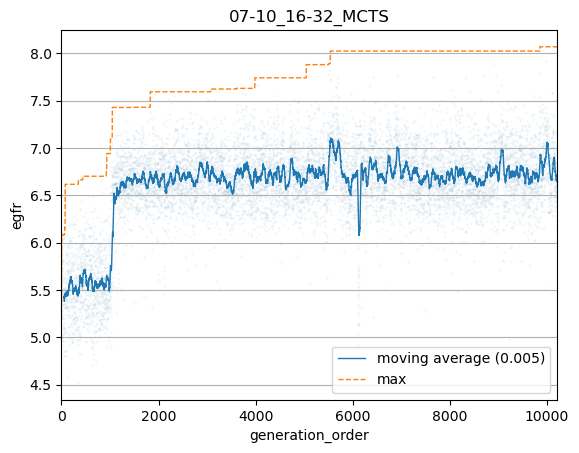

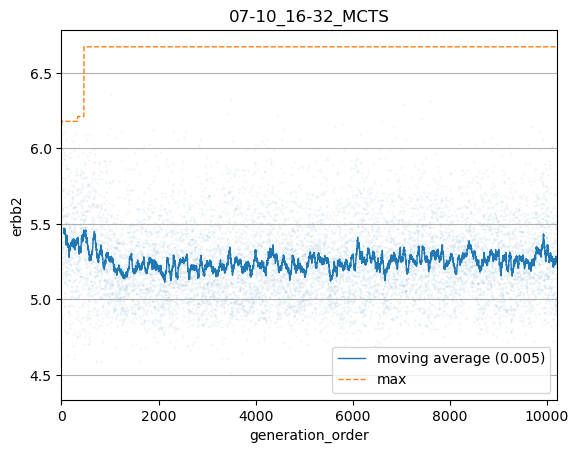

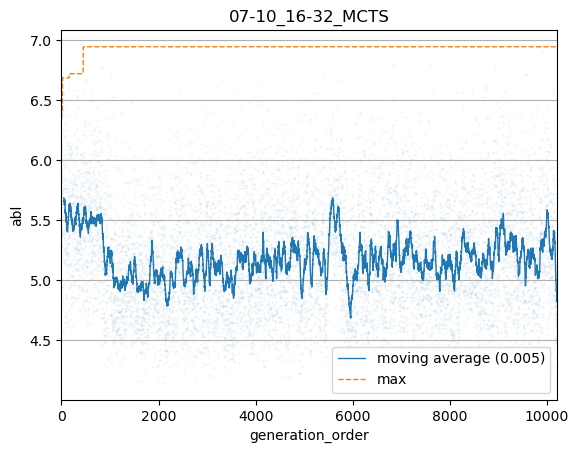

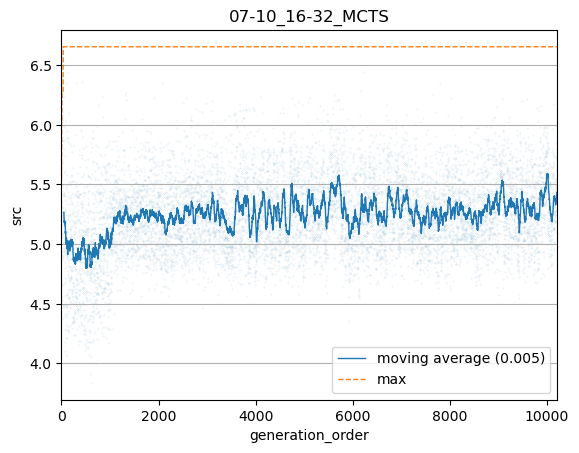

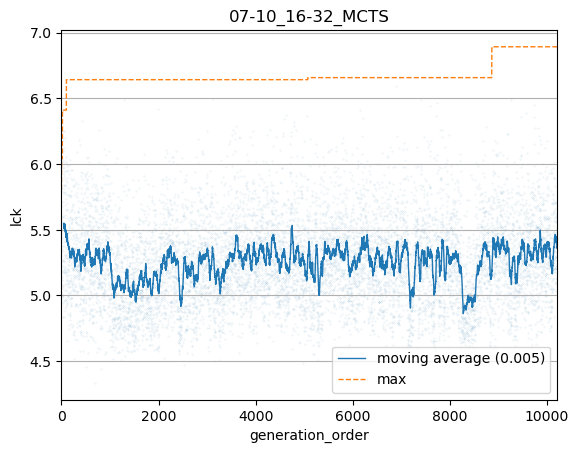

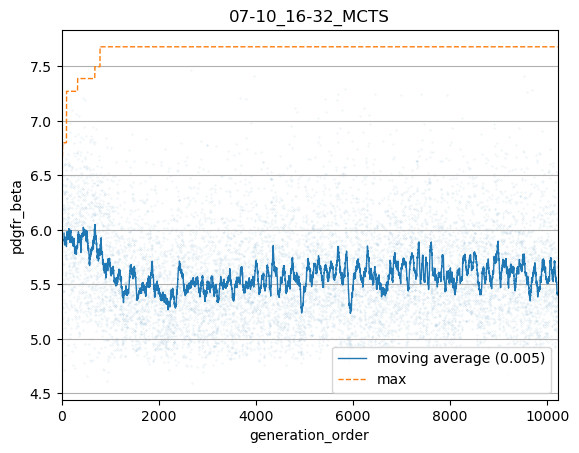

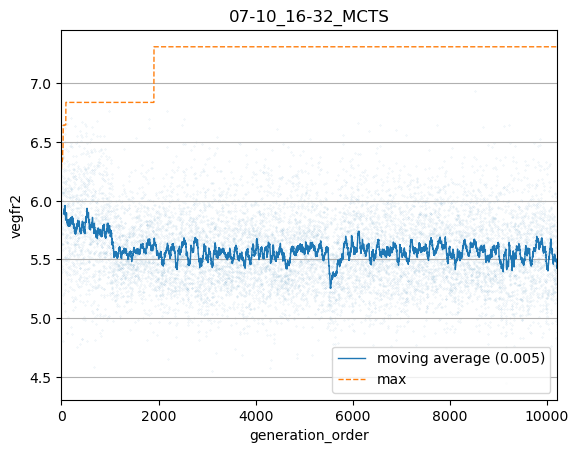

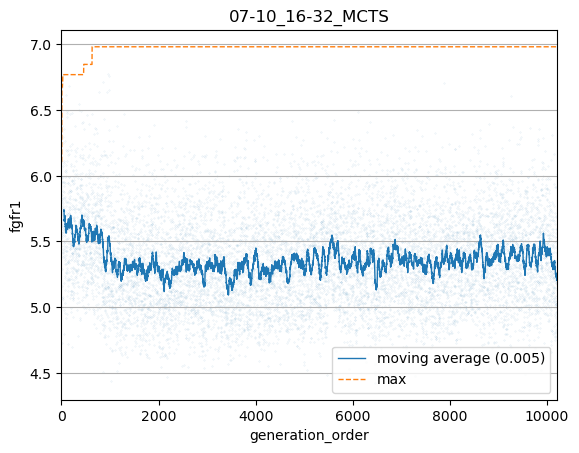

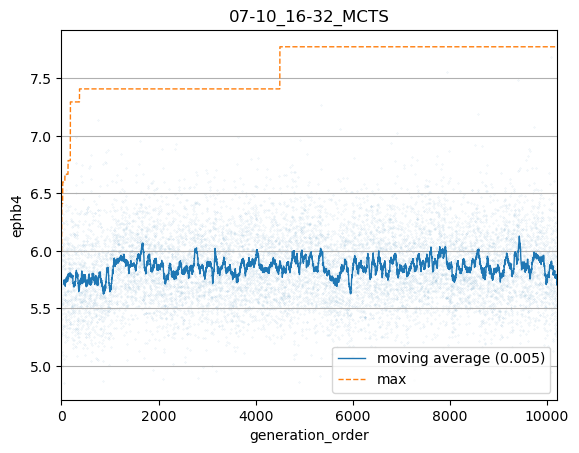

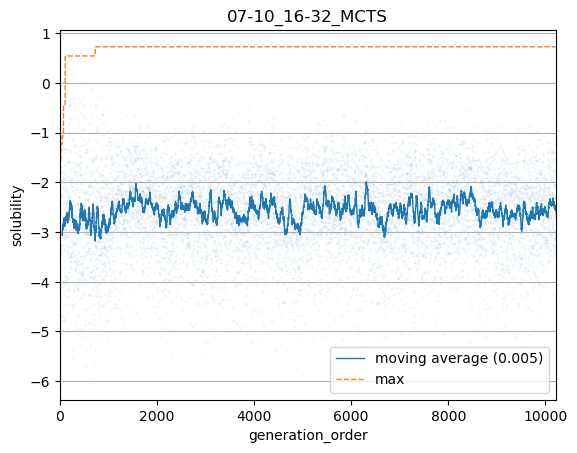

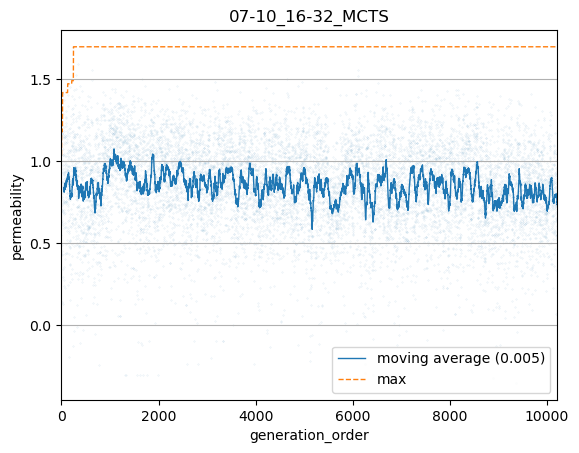

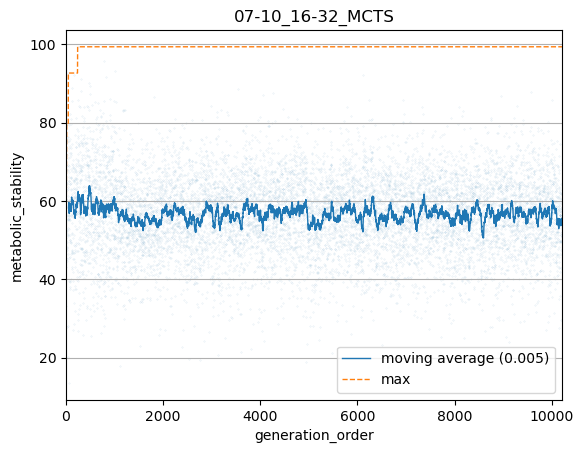

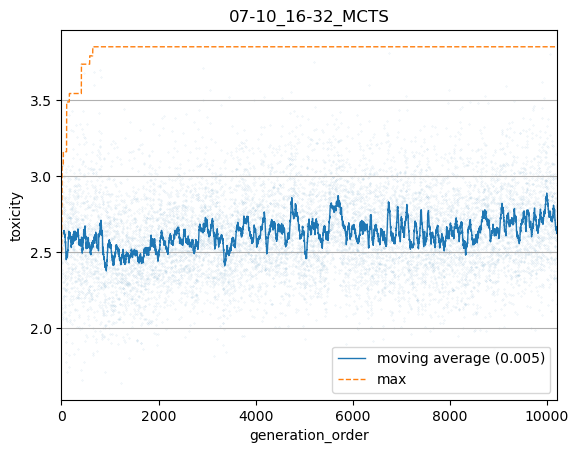

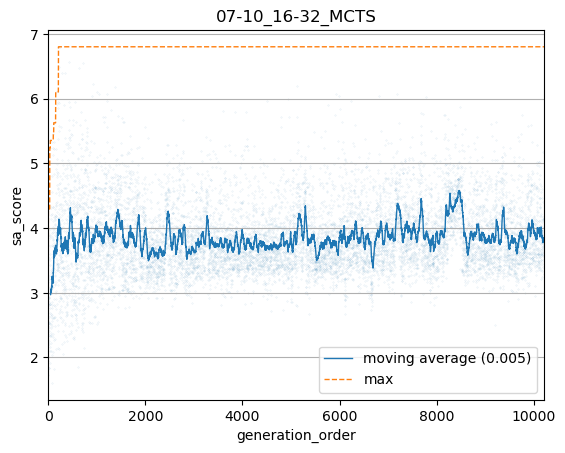

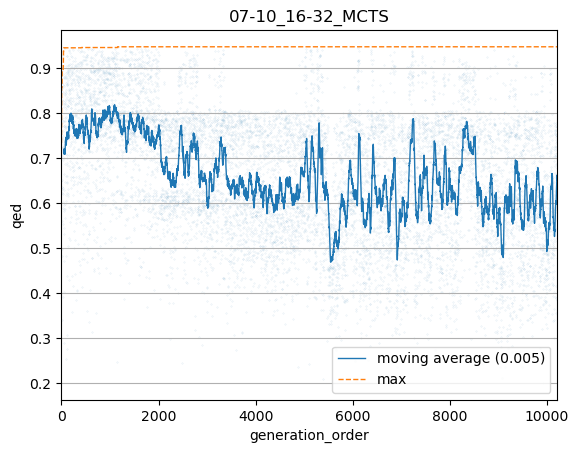

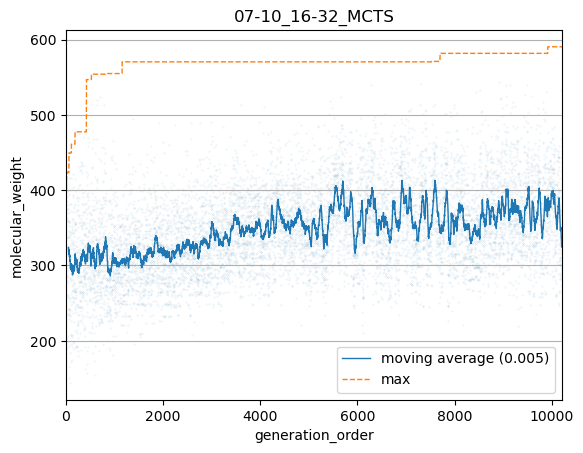

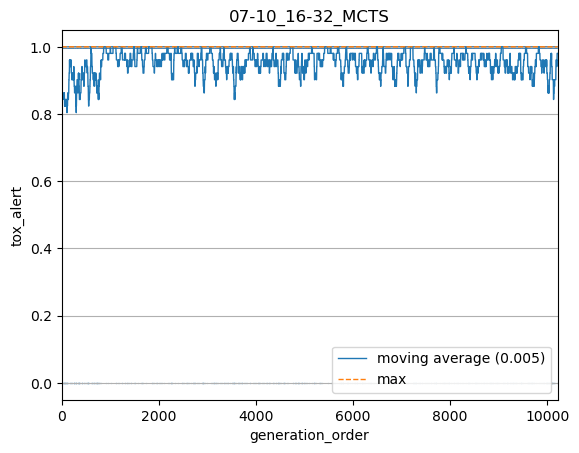

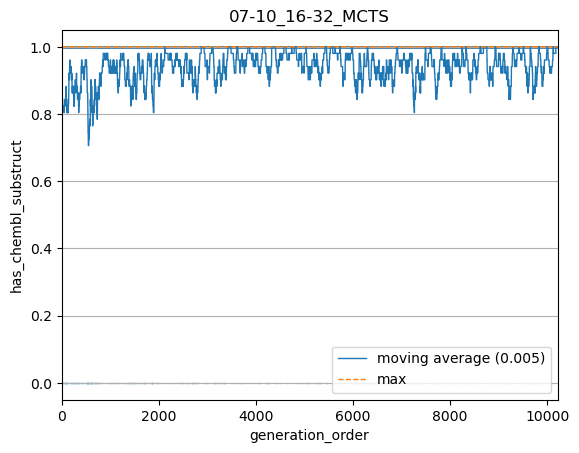

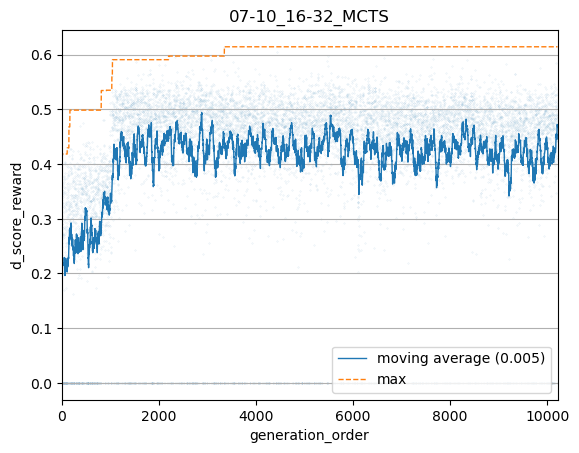

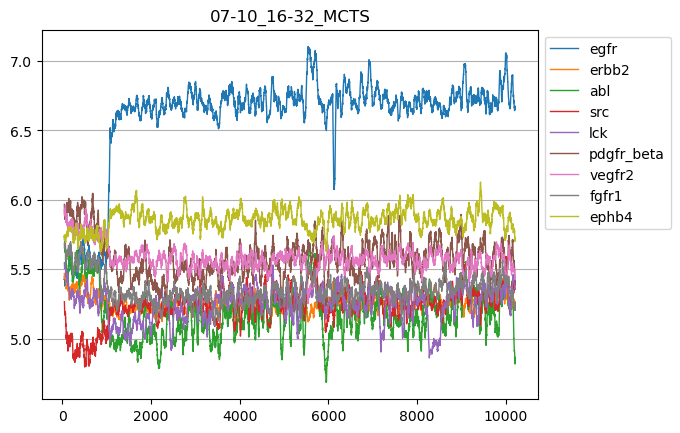

number of generated nodes: 10214
valid rate: 0.9155625290562529
unique rate: 0.6780567178056718
node_per_sec: 22.03983855437004
best_reward: 0.614181304872361
average_reward: 0.4109816272481188


In [4]:
# start generation

# yaml_path = "config/mcts_helm.yaml"
# yaml_path = "config/mcts_smiles.yaml"
# yaml_path = "config/model_test.yaml"
yaml_path = "config/mcts_d_score.yaml"
# yaml_path = "config/mcts_biot5.yaml"
# yaml_path = "config/mcts_smirks.yaml"

conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
# queue_generations(c1, c2)

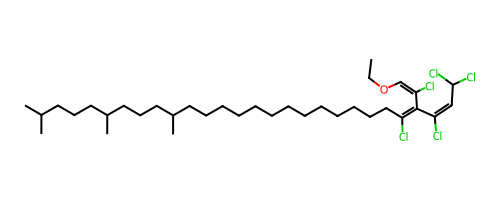

In [14]:
from node import MolStringNode
from language import SELFIES
from utils import draw_mol
x = MolStringNode.node_from_key("[C][C][O][C][=C][Branch1][C][Cl][C][=C][Branch1][C][Cl][C][Branch2][Ring2][=Branch2][C][C][C][C][C][C][C][C][C][C][C][C][C][Branch1][C][C][C][C][C][C][Branch1][C][C][C][C][C][C][Branch1][C][C][C].[Cl][=C][Branch1][C][Cl][C][=C][Ring2][Ring2][C][Cl]", lang=SELFIES())
mol = x.mol()
draw_mol(mol, 500, 200)

In [ ]:
# continue generation
generator.generate(time_limit=conf.get("time_limit") - generator.passed_time, max_generations=conf.get("max_generations") - len(generator.unique_keys))
generator.plot(**conf.get("plot_args", {}))
generator.analyze()

Starting generation...


In [16]:
#save mcts
save_path = generator.output_dir() + "save.mcts"
generator.save(save_path)

In [ ]:
#load generator and yaml
from generator import Generator
load_dir = "generation_result/06-26_08-51/"
conf = conf_from_yaml("sandbox/" + load_dir + "setting.yaml", repo_root)
generator = generator_from_conf(conf, repo_root)
generator = Generator.load(load_dir + "save.mcts", generator.transition)

In [ ]:
#time test
import cProfile
import pstats

profiler = cProfile.Profile()
profiler.enable()
conf = conf_from_yaml(yaml_path, repo_root)
generator = generator_from_conf(conf, repo_root)
generate_and_analyze(generator, conf)
profiler.disable()

stats = pstats.Stats(profiler)
stats.sort_stats("cumtime").print_stats(100)